# <i class="fa-solid fa-divide"></i> LDA & QDA


If we briefly recap the previously introduced classification algorithms, logistic regression and k-nearest neighbors are referred to as **discriminative models**. This means they try to establish a decision boundary (discriminator), which best separate the classes. 

In contrast, **generative models** such as Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) (and also Naïve Bayes, which will be introduced in the next session) see the world with different eyes! They are focused on learning the *underlying distribution* of the data and its labels.

```{admonition} Generative models
:class: tip

- Learn the distribution of features for each class, not just how to separate them
- Use this information to calculate the likelihood of new data belonging to each class
- Can generate new samples by sampling from the learned distributions
```

## Linear Discriminant Analysis (LDA)

LDA assumes that:

- The features are distributed according to a multivariate Gaussian distribution
- Classes share the same covariance matrix

As a visual intuition, this means the class distributions look like ellipses with the same shape and orientation (but centered at different locations if there is a difference between the classes). In detail, LDA requires 4 steps to make a decision:

- **Step 1**: Model the distribution of the predictors $X$ separately for each response class $Y$
- **Step 2**: Use Bayes' theorem to calculate estimates for the posterior probability
- **Step 3**: Derive the discriminant function for each class
- **Step 4**: Apply a decision rule to classify the observation

---

**Step 1: Estimate Class Distributions**

We assume that each class $k$ generates its data points from a multivariate normal distribution:

$$
P(X | Y = k) = \frac{1}{(2\pi)^{p/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (X - \mu_k)^T \Sigma^{-1} (X - \mu_k)\right)
$$

where:

- $X$ is the feature vector
- $p$ is the number of features
- $\mu_k$ is the mean vector of class $k$
- $\Sigma$ is the covariance matrix (assumed to be the same for all classes)

> 💡 Key Assumption: LDA assumes that all classes share the same covariance matrix $\Sigma$. This makes the decision boundaries linear.

---

**Step 2: Apply Bayes' Theorem**

We want to know the posterior probability. This is the probability of a class $k$ given a new observation $X$:

$$
P(Y = k | X) = \frac{P(X | Y = k) P(Y = k)}{P(X)}
$$

where:

- $P(X | Y = k)$ is the likelihood (the Gaussian density from Step 1)
- $P(Y = k)$ is the prior probability of class $k$ (how frequent the class is in the data)
- $P(X)$ is the evidence (the overall probability of observing $X$)

> 💡 We model how each class generates the data, and then use Bayes' theorem to "flip" this around and find the most likely class for a new point.

---

When performing classification, we only need to compare which posterior probability is largest. Taking the logarithm preserves the order of the probabilities while simplifying multiplication into addition. Further, the evidence $P(X)$ is the same across all classes (because it is the sum over all classes) and therefore does not affect the relative ranking. This allows us to drop it and work with proportionality ($\propto$):

$$
\log P(Y = k | X) \propto \log P(X | Y = k) + \log P(Y = k)
$$

---

**Step 3: Derive the Discriminant Function**

We can then perform some linear algebra (substitute the multivariate Gaussian density into the log expression, expand the quadratic form, and remove terms independent of the class $k$; see [James et al. (ISLR) Chapter 4.4](https://www.statlearning.com/) if you are interested in the details). This will then result in the discriminant function $\delta_k(X)$:

$$
\delta_k(X) = X^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log(\pi_k)
$$

where:

- $X^T \Sigma^{-1} \mu_k$ is the projection of the data onto the mean direction
- $-\frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k$ adjusts for the distribution's spread
- $\log(\pi_k)$ adjusts for how common the class is (prior probability)

---

**Step 4: Decision Rule**

The final decision is made by comparing the discriminant functions, and we classify the new observation into the class with the highest discriminant value:

$$
\hat{Y} = \arg \max_k \delta_k(X)
$$

---

## Quadratic Discriminant Analysis (QDA)

QDA is a more flexible version of LDA. It:
- Also assumes Gaussian distributions for each class.
- Allows each class to have its own covariance matrix, resulting in quadratic decision boundaries.

The discriminant function for QDA is:

$$
\delta_k(X) = -\frac{1}{2} (X - \mu_k)^T \Sigma_k^{-1} (X - \mu_k) - \frac{1}{2} \log |\Sigma_k| + \log(\pi_k)
$$

where:
- $\Sigma_k$ is the covariance matrix specific to class $k$
- The determinant term $|\Sigma_k|$ is present because the spread varies between classes 


```{admonition} Choosing Between LDA and QDA
:class: tip

- **LDA** is ideal when you assume the classes share a similar spread in the feature space
- **QDA** is more appropriate when the spread differs significantly across classes and non-linear boundaries are expected
```


## LDA and QDA in Python

LDA and QDA can be implemented in Python using `sklearn`. In this example, we use artifical data for classification (2 features, 2 classes):

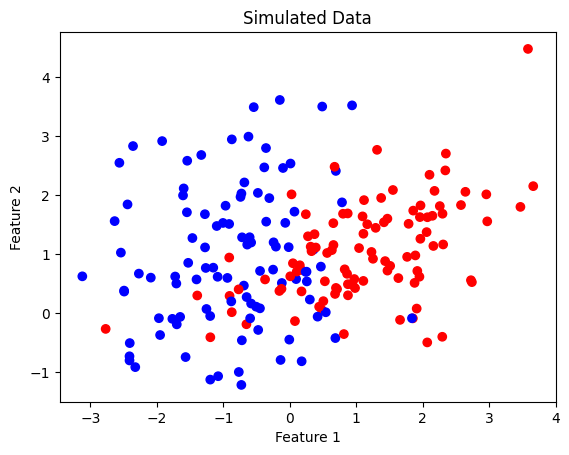

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, 
                           random_state=42)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
ax.set(title="Simulated Data", xlabel="Feature 1", ylabel="Feature 2");

Fitting the model is straightforward. However, please have a look at the [documentation](https://scikit-learn.org/stable/api/sklearn.discriminant_analysis.html) for additional options such as the specific solver.

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, \
                                          QuadraticDiscriminantAnalysis as QDA

lda = LDA()
lda.fit(X, y)

qda = QDA()
qda.fit(X, y);

We can then print the classification report:

In [3]:
from sklearn.metrics import classification_report

# Print classification report
print('LDA Classification Report:')
print(classification_report(y, lda.predict(X)))

print('QDA Classification Report:')
print(classification_report(y, qda.predict(X)))

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       100
           1       0.83      0.85      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

QDA Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       100
           1       0.87      0.88      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



To get a better intuitive understanding about the models, we can further plot the decision boundaries by making systematic predictions across a grid in the feature space and coloring it accordingly. It then becomes visible how the decision boundary is linear for LDA and quadratic for QDA:

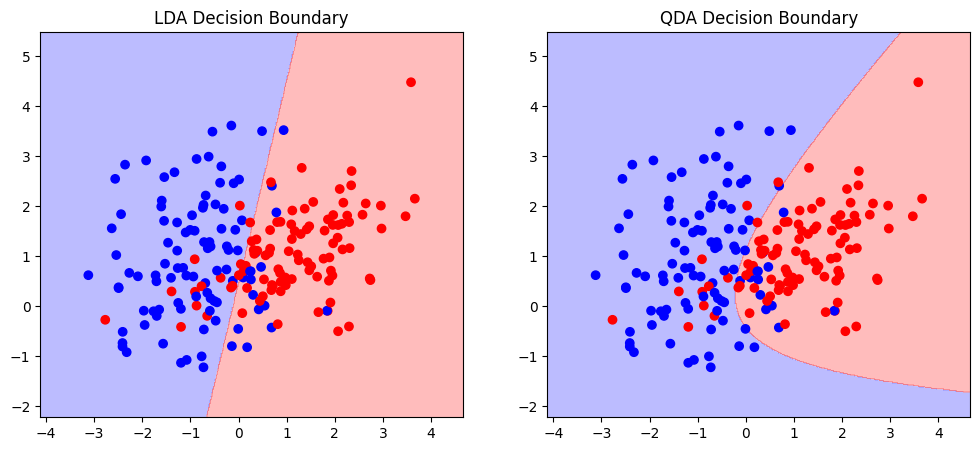

In [4]:
import numpy as np

def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

# Plot decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].set_title('LDA Decision Boundary')
plot_decision_boundary(lda, X, y, ax[0])

ax[1].set_title('QDA Decision Boundary')
plot_decision_boundary(qda, X, y, ax[1])
plt.show()